In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hmlstm.hmlstm_network import HMLSTMNetwork
from hmlstm import plot_indicators
import tensorflow as tf
from text_input_utils import prepare_inputs
import tensorflow as tf
from string import ascii_lowercase

%matplotlib inline
%load_ext autoreload
%autoreload 2

### Regression example

In [2]:
# simulate multiresolution data
num_signals = 300
signal_length = 40
x = np.linspace(0, 200 * np.pi, signal_length)
signals = [np.random.normal(0, .5, size=signal_length) +
           (2 * np.sin(.6 * x + np.random.random() * 100 * np.pi))
           + (5 * np.sin(.1* x + np.random.random() * 100 * np.pi))
           +( 10 * np.sin(.03 * x + np.random.random() * 100 * np.pi))
    for _ in range(num_signals)]

split = int(num_signals * .8)
train = signals[:split]
test = signals[split:]

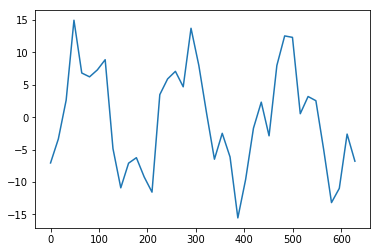

In [3]:
# example signal
plt.plot(x, signals[2]);

In [4]:
# prepare data
train_batches_in = []
train_batches_out = []
batch_size = 10
start = 0
while start + batch_size < len(train):
    batch = train[start: start + batch_size]
    
    train_batches_in.append(np.array([s[:-1] for s in batch]).reshape(batch_size, -1, 1))
    train_batches_out.append(np.array([s[1:] for s in batch]).reshape(batch_size, -1, 1))

    start += batch_size
    
    
batch_size = 2
start = 0
test_batches_in = []
test_batches_out = []
while start + batch_size < len(test):
    batch = test[start: start + batch_size]
    
    test_batches_in.append(np.array([s[:-1] for s in batch]).reshape(batch_size, -1, 1))
    test_batches_out.append(np.array([s[1:] for s in batch]).reshape(batch_size, -1, 1))

    start += batch_size


In [5]:
tf.reset_default_graph()
network = HMLSTMNetwork(input_size=1, task='regression', hidden_state_sizes=13,
                       embed_size=20, out_hidden_size=13, num_layers=3)

In [6]:
network.train(train_batches_in, train_batches_out, epochs=1, load_vars_from_disk=False)

Epoch 0
loss: 64.7286
loss: 64.8358
loss: 64.9887
loss: 64.555
loss: 64.2613
loss: 63.783
loss: 64.293
loss: 64.2687
loss: 64.1451
loss: 63.6549
loss: 63.8638
loss: 63.9243
loss: 63.9785
loss: 63.3851
loss: 63.8879
loss: 63.2058
loss: 63.3518
loss: 63.4843
loss: 62.666
loss: 63.0044
loss: 62.7967
loss: 63.6331
loss: 63.1847
saving variables...


In [7]:
batch_num = 3

In [8]:
boundaries = network.predict_boundaries(test_batches_in[batch_num])
print(boundaries)

[[[ 1.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.  0.  0.  0.
    0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.
    1.  1.  1.]
  [ 0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
    0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.  0.]
  [ 0.  0.  0.  0.  0.  1.  1.  1.  0.  1.  1.  0.  0.  1.  1.  1.  0.  0.
    0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.  0.]]

 [[ 0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.
    0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  1.
    1.  0.  1.]
  [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.
    0.  1.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.
    0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.  1.  1.  0.  1.
    1.  1.  1.]]]


In [9]:
predictions = network.predict(test_batches_in[batch_num])

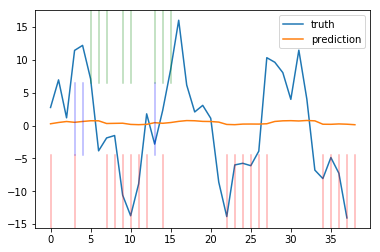

In [17]:
plot_indicators(test_batches_in[batch_num][0], predictions[0], indicators=boundaries[0]);

In [11]:
#NOTE: Underpowered networks make more use of boundaries

### Text classificaiton example

In [2]:
tf.reset_default_graph()
network = HMLSTMNetwork(output_size=29, input_size=29,
                        embed_size=1024, out_hidden_size=500,
                        hidden_state_sizes=500, 
                       task='classification')

In [13]:
batch_size = 10
truncate_len = 1000
num_layers = 3
num_batches = 20

inputs = prepare_inputs(
    batch_size=batch_size, truncate_len=truncate_len, num_batches=num_batches)

In [14]:
ins = np.array(inputs[0])
outs = np.array(inputs[1])

In [ ]:
print(ins.shape)
print(outs.shape)

(20, 10, 1000, 29)
(20, 10, 1000, 29)


In [ ]:
# test on last input\
network.train(ins, outs, load_vars_from_disk=True, save_vars_to_disk=True)

Epoch 0
loss: 2.64853
loss: 2.62743
loss: 2.61411
loss: 2.56177
loss: 2.49725
loss: 2.50744
loss: 2.46088
loss: 2.41505
loss: 2.48229
loss: 2.47959
loss: 2.475
loss: 2.40246
loss: 2.42977
loss: 2.37717
loss: 2.39545
loss: 2.40337
loss: 2.36147
loss: 2.34817
loss: 2.3094
loss: 2.32877
Epoch 1
loss: 2.36615
loss: 2.35703
loss: 2.34848
loss: 2.3226
loss: 2.29355
loss: 2.25462
loss: 2.27982
loss: 2.2273
loss: 2.27041
loss: 2.28272
loss: 2.30476
loss: 2.1998
loss: 2.24114
loss: 2.22359
loss: 2.22821
loss: 2.2389
loss: 2.22388
loss: 2.1966
loss: 2.17398
loss: 2.18925
Epoch 2
loss: 2.23327
loss: 2.20479
loss: 2.2124
loss: 2.177
loss: 2.16638
loss: 2.12344
loss: 2.1594
loss: 2.1014
loss: 2.15834
loss: 2.16149
loss: 2.19506


In [ ]:
batch_number = 2

In [ ]:
# predictions on last input
indicators = network.predict_boundaries(np.array(ins[batch_number]))
indicators[0]

In [ ]:
# predictions on last input
predictions = network.predict(ins[batch_number])

In [ ]:
def get_text(encoding):
    prediction = ''
    
    for char in np.squeeze(encoding):
        max_likelihood = np.where(char == np.max(char))[0][0]
        if max_likelihood < 26:
            prediction += ascii_lowercase[max_likelihood]
        elif max_likelihood == 26:
            prediction += ','
        elif max_likelihood == 27:
            prediction += '.'
        elif max_likelihood == 28:
            prediction += ' '
    
    return prediction

In [ ]:
get_text(predictions[0])

In [ ]:
get_text(ins[batch_number][0, 1:])